<a href="https://colab.research.google.com/github/CaioSilvaOliveira/ClasssificadorDeVinhos_App/blob/main/MVP_Caio_Oliveira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Machine Learning: MVP - Caio Silva Oliveira

Objetivo: Prever a classe do vinho (0, 1 ou 2) com base nos 13 atributos químicos, utilizando algoritmos de classificação como KNN, Árvores de Decisão, SVM e Naive Bayes.

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [ ]:
# Carregar dataset do sklearn.datasets
data = load_wine()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


# Mostra as primeiras linhas do dataset
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 42 # semente aleatória

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.701923 (0.047820)
CART: 0.927564 (0.056253)
NB: 0.952564 (0.072535)
SVM: 0.653846 (0.077720)


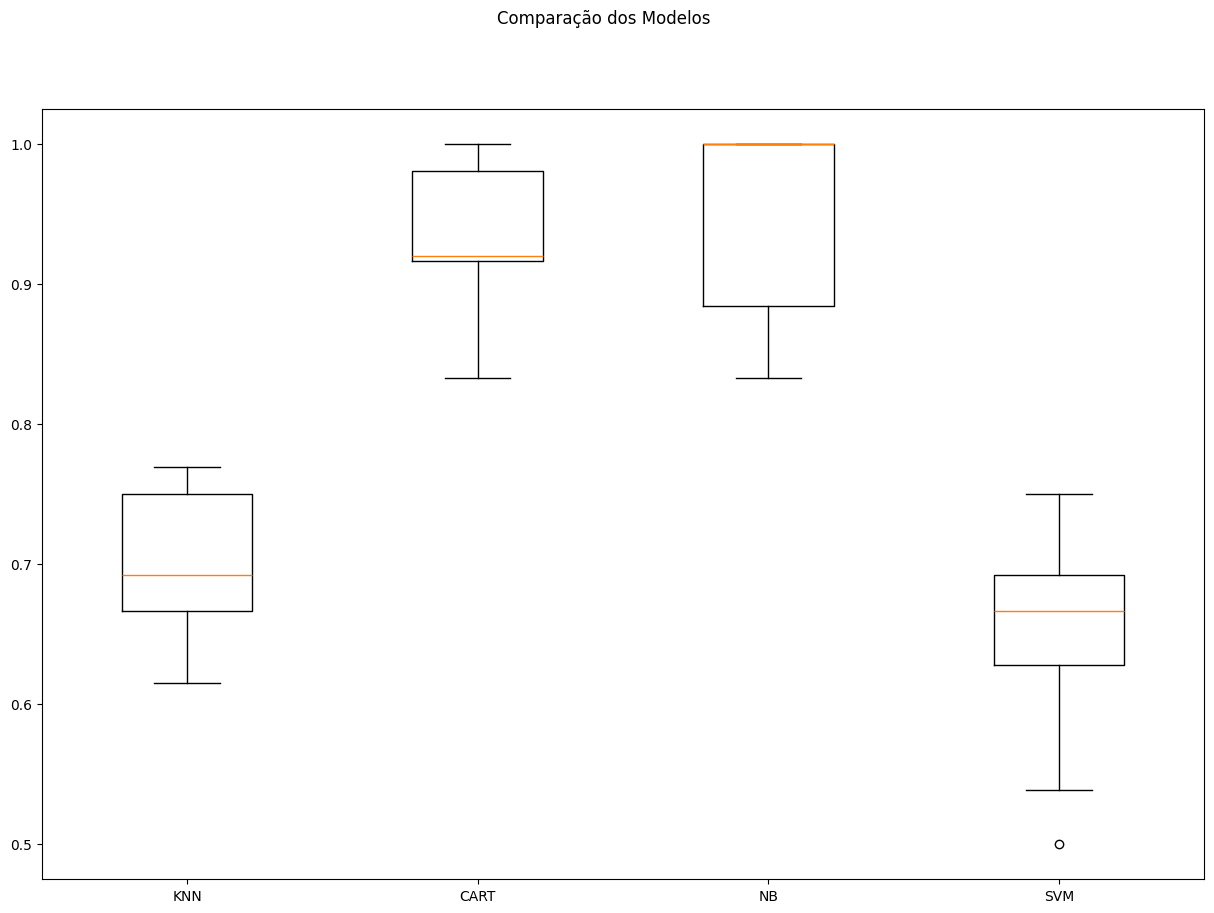

In [ ]:
np.random.seed(42) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.702 (0.048)
CART-orig: 0.928 (0.056)
NB-orig: 0.953 (0.073)
SVM-orig: 0.654 (0.078)
KNN-padr: 0.976 (0.037)
CART-padr: 0.936 (0.060)
NB-padr: 0.953 (0.073)
SVM-padr: 0.992 (0.025)
KNN-norm: 0.968 (0.039)
CART-norm: 0.920 (0.072)
NB-norm: 0.953 (0.073)
SVM-norm: 0.992 (0.025)


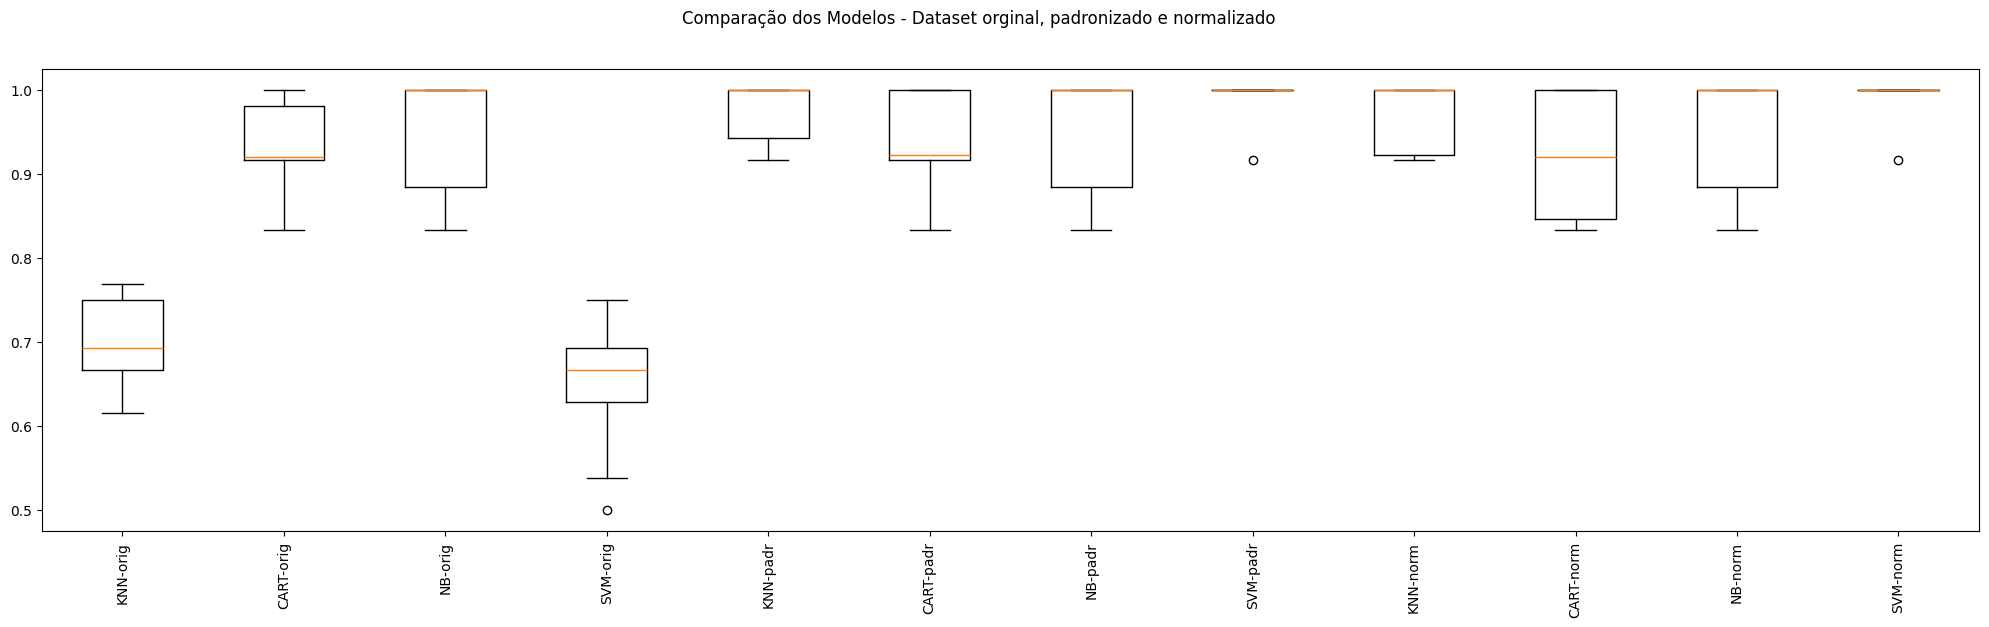

In [ ]:
np.random.seed(42) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

Podemos analisar que os modelos SVM-padr e SVM-norm tiveram o melhor desempenho, tendo a mesma acurácia. Para otimização de hiperparâmetros escolherei o modelo **SVM-norm**.

* **SVM-norm (SVM com Normalização):** 0,992.
* SVM-padr (SVM com Padronização): 0,992.

In [ ]:
# Tuning do SVM-norm

np.random.seed(42) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando o pipeline para SVM-norm
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

param_grid = {
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__gamma': ['scale', 'auto', 0.1, 1, 10, 100],
    'SVM__kernel': ['rbf', 'linear'],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Tuning do %s - Melhor: %.3f usando %s" % (name, grid.best_score_, grid.best_params_))

Tuning do SVM-norm - Melhor: 0.992 usando {'SVM__C': 1, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Selecionando o melhor modelo do GridSearchCV
best_svm_model = grid.best_estimator_
print(best_svm_model)

# Avaliando o melhor modelo com o conjunto de testes
predictions = best_svm_model.predict(X_test)
print("Precisão do modelo com o conjunto de teste: %f" % accuracy_score(y_test, predictions))

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('SVM', SVC(C=1))])
Precisão do modelo com o conjunto de teste: 1.000000


In [ ]:
# Preparação do modelo com Todo o dataset
final_model = best_svm_model.fit(X, y)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Simulando a aplicação do modelo em dados não vistos

# Novos dados - não sabemos a classe!
data_new = {
    'alcohol': [13.5],
    'malic_acid': [1.5],
    'ash': [2.5],
    'alcalinity_of_ash': [18.0],
    'magnesium': [100.0],
    'total_phenols': [2.8],
    'flavanoids': [3.0],
    'nonflavanoid_phenols': [0.3],
    'proanthocyanins': [1.5],
    'color_intensity': [5.0],
    'hue': [1.0],
    'od280/od315_of_diluted_wines': [3.5],
    'proline': [1000.0]
}

entrada = pd.DataFrame(data_new)

In [ ]:
# Predição de classes dos dados de entrada
saidas = final_model.predict(entrada)

print("Predicted class for the new data:", saidas[0])

Predicted class for the new data: 0


In [ ]:
# Salvando o modelo final
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)